# HEALTH INSURANCE LEAD PREDICTION ANN MODEL

In [140]:
# IMPORT THE LIBRARIES
import numpy as np # for numerical computation
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt  # for data visualization
import tensorflow as tf

# PART 1. DATA PREPROCESSING

### A. Import the Dataset

In [250]:
# Load the dataset
dataset = pd.read_csv('Machine Problem 1_Rebanal_Princess_Girly_ECE 649_OriginalDataset.csv')

# Display the first few rows of the dataset
# print(dataset.head())

### B. Encoding the Categorical Data


##### Preprocessing test 1

In [194]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Handling missing values for categorical features by filling with mode
dataset['Health Indicator'].fillna(dataset['Health Indicator'].mode()[0], inplace=True)
dataset['Holding_Policy_Duration'].fillna(dataset['Holding_Policy_Duration'].mode()[0], inplace=True)
dataset['Holding_Policy_Type'].fillna(dataset['Holding_Policy_Type'].mode()[0], inplace=True)

# Defining features and target variable
X = dataset.drop(columns=['ID', 'Response'])
y = dataset['Response']

# List of categorical columns for one-hot encoding
categorical_features = ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 
                        'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration']

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), [col for col in X.columns if col not in categorical_features])
    ])

# Creating a pipeline to handle preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Applying preprocessing to the features
X = pipeline.fit_transform(X)


# print(dataset.info())

##### Preprocessing test 2

In [251]:
from sklearn.preprocessing import LabelEncoder

# Handling missing values for categorical features by filling with mode
dataset['Health Indicator'].fillna(dataset['Health Indicator'].mode()[0], inplace=True)
dataset['Holding_Policy_Duration'].fillna(dataset['Holding_Policy_Duration'].mode()[0], inplace=True)
dataset['Holding_Policy_Type'].fillna(dataset['Holding_Policy_Type'].mode()[0], inplace=True)

# Encoding categorical variables
label_encoder = LabelEncoder()
dataset['City_Code'] = label_encoder.fit_transform(dataset['City_Code'])
dataset['Accomodation_Type'] = label_encoder.fit_transform(dataset['Accomodation_Type'])
dataset['Reco_Insurance_Type'] = label_encoder.fit_transform(dataset['Reco_Insurance_Type'])
dataset['Is_Spouse'] = label_encoder.fit_transform(dataset['Is_Spouse'])
dataset['Health Indicator'] = label_encoder.fit_transform(dataset['Health Indicator'])
dataset['Holding_Policy_Duration'] = label_encoder.fit_transform(dataset['Holding_Policy_Duration'])

# print(dataset.info())

### C. Splitting the Dataset into Training Dataset & Testing Dataset


In [252]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')


Training set size: 40705 samples
Testing set size: 10177 samples


### D. Perform Feature Scaling


In [221]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print('Feature scaling completed.')

Feature scaling completed.


### E. Perform SMOTE

In [268]:
from collections import Counter

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN

counter = Counter(y_train)
print("Before", counter)
# 
# sm = SMOTE(random_state=42)
# sm = ADASYN(random_state=42)
sm = SMOTETomek(random_state=42)
# sm = SMOTEENN()

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print("Before", counter)

Before Counter({0: 30954, 1: 9751})
Before Counter({0: 28363, 1: 28363})


# PART 2. BUILDING THE ARTIFICIAL NEURAL NETWORK MODEL

In [281]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout

model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(units=6, activation="relu"))
model.add(Dropout(rate=0.3))
model.add(Dense(units=3, activation="relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_252 (Dense)               │ (None, 6)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_253 (Dense)               │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_254 (Dense)               │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109 (436.00 B)

 Trainable params: 109 (436.00 B)

 Non-trainable params: 0 (0.00 B)

### A. Importing the Keras Libraries and Packages


In [208]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

### B. Initializing the ANN


In [255]:
model = Sequential()

### C. Adding the Input Layer and the First Hidden Layer


In [256]:
model.add(Input(shape=(X_train.shape[1],)))

In [257]:
model.add(Dense(units=6, activation='relu'))

### D. Adding the Second Hidden Layer


In [226]:
model.add(Dense(units=6, activation='relu'))

### E. Adding the Output Layer


In [258]:
model.add(Dense(units=1, activation='sigmoid'))

# PART 3. TRAINING THE ARTIFICIAL NEURAL NETWORK MODEL

### A. Compiling the ANN 


In [259]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### B. Summarizing the ANN Model


In [260]:
model.summary()

Model: "sequential_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_225 (Dense)               │ (None, 6)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_226 (Dense)               │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

### B. Fitting the ANN Model on the Training Dataset


In [282]:
model.fit(X_train_sm, y_train_sm, batch_size=32, epochs=100)

y_pred = (model.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix")
plt.show()

Epoch 1/100
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 2s 568us/step - accuracy: 0.5058 - loss: 461.4499
Epoch 2/100
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - accuracy: 0.5058 - loss: 0.7785
Epoch 3/100
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - accuracy: 0.5018 - loss: 0.7588
Epoch 4/100
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.4968 - loss: 0.7354
Epoch 5/100
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - accuracy: 0.4951 - loss: 0.7313
Epoch 6/100
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - accuracy: 0.4980 - loss: 0.7054
Epoch 7/100
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 1s 563us/step - accuracy: 0.4989 - loss: 0.6959
Epoch 8/100
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step - accuracy: 0.4973 - loss: 0.6936
Epoch 9/100
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - accuracy: 0.4982 - loss: 0.6932
Epoch 10/100
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - accuracy: 0.4916 - loss: 0.6932
Epoch 11/100
1773/1773 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.4973 - loss: 0.

# PART 4. MAKING PREDICTIONS AND EVALUATING THE ANN MODEL


### A. Predicting the Output of the Testing Dataset

In [266]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


### B. To Generate and Plot the Confusion Matrix

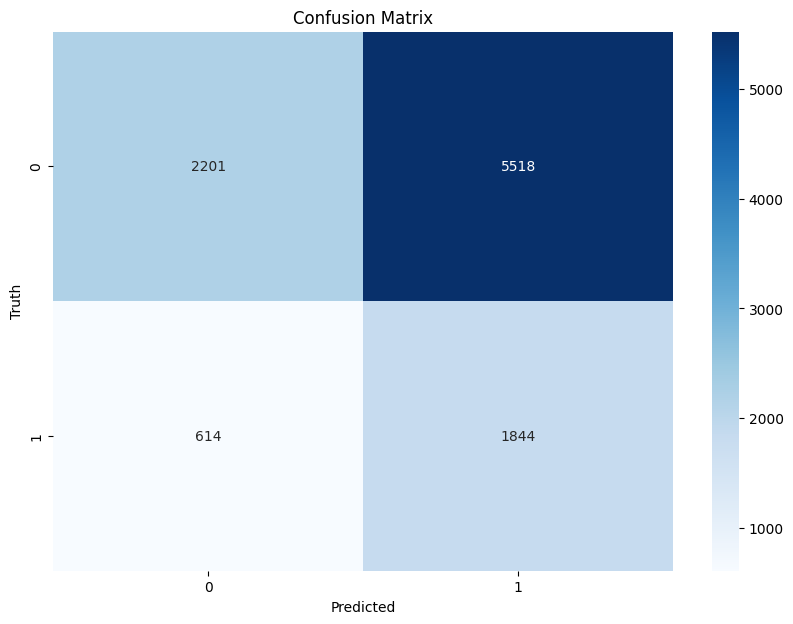

In [267]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

### C. Computing the Hold-Out Accuracy


In [270]:
hold_out_accuracy = model.evaluate(X_test, y_test)[1]
print(f"Hold-Out Accuracy: {hold_out_accuracy}")

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.6752 - loss: 0.6459
Hold-Out Accuracy: 0.6726933121681213


### D. Generating the Classification Report


In [271]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred,zero_division=0)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      7719
           1       0.26      0.20      0.23      2458

    accuracy                           0.67     10177
   macro avg       0.51      0.51      0.51     10177
weighted avg       0.64      0.67      0.66     10177



### E. Predicting the Output of the Single Observation

In [272]:
single_observation_index = 0
single_observation = X_test[single_observation_index].reshape(1, -1)

single_pred = (model.predict(single_observation) > 0.5).astype("int32")

single_observation_details = dataset.iloc[single_observation_index, :-1]

print("Details of the single observation:")
print(single_observation_details)

print(f"\nPrediction for the single observation: {single_pred[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Details of the single observation:
ID                             1.0
City_Code                     22.0
Region_Code                 3213.0
Accomodation_Type              1.0
Reco_Insurance_Type            0.0
Upper_Age                     36.0
Lower_Age                     36.0
Is_Spouse                      0.0
Health Indicator               0.0
Holding_Policy_Duration        5.0
Holding_Policy_Type            3.0
Reco_Policy_Cat               22.0
Reco_Policy_Premium        11628.0
Name: 0, dtype: float64

Prediction for the single observation: 0


# PART 5: PERFORM K-FOLD CROSS-VALIDATION TO ASSESS THE PERFORMANCE OF THE ANN MODEL


### A. To Feature Scale the X Variable Using the StandardScaler


In [273]:
X_standard = X.copy()
X_standard = sc.fit_transform(X_standard)

### B. Build the ANN Classifier Using the KerasClassifier


In [275]:
from scikeras.wrappers import KerasClassifier

# Function to build the ANN model
def build_classifier():
    model = Sequential()

    model.add(Input(shape=(X_train_sm.shape[1],)))
    model.add(Dense(units=6, activation="relu"))
    model.add(Dense(units=1, activation="sigmoid"))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the Keras classifier
classifier = KerasClassifier(model=build_classifier, batch_size=32, epochs=100)

### C. Import the **StratifiedKFold** Class


In [276]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

### D. Import the **cross_val_score** Class


In [277]:
from sklearn.model_selection import cross_val_score

### E. Perform the k-Fold Cross Validation


#### E.1 Using **Accuracy** as the Scoring Metric for Cross-Valdiation


In [278]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

accuracies = cross_val_score(estimator=classifier, X=X_standard, y=y, cv=kfold, scoring='accuracy')

print(f"Accuracy Mean: {accuracies.mean()}, Accuracy Standard Deviation: {accuracies.std()}")

Epoch 1/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.7365 - loss: 0.5838
Epoch 2/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.7594 - loss: 0.5501
Epoch 3/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 547us/step - accuracy: 0.7602 - loss: 0.5459
Epoch 4/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 543us/step - accuracy: 0.7598 - loss: 0.5439
Epoch 5/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step - accuracy: 0.7595 - loss: 0.5439
Epoch 6/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 565us/step - accuracy: 0.7581 - loss: 0.5451
Epoch 7/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.7589 - loss: 0.5436
Epoch 8/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.7590 - loss: 0.5444
Epoch 9/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 558us/step - accuracy: 0.7582 - loss: 0.5434
Epoch 10/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - accuracy: 0.7591 - loss: 0.5439
Epoch 11/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - accuracy: 0.7602 - loss: 0.54

KeyboardInterrupt: 

#### E.2 Using **F1-Score** as the Scoring Metric for Cross-Valdiation


In [ ]:
f1_scores = cross_val_score(estimator=classifier, X=X_standard, y=y, cv=kfold, scoring='f1')

print(f"F1-Score Mean: {f1_scores.mean()}, F1-Score Standard Deviation: {f1_scores.std()}")


#### E.3 Using **Precision** as the Scoring Metric for Cross-Valdiation


In [ ]:
precisions = cross_val_score(estimator=classifier, X=X_standard, y=y, cv=kfold, scoring='precision')

print(f"Precision Mean: {precisions.mean()}, Precision Standard Deviation: {precisions.std()}")


#### E.4 Using **Recall** as the Scoring Metric for Cross-Valdiation


In [ ]:
recalls = cross_val_score(estimator=classifier, X=X_standard, y=y, cv=kfold, scoring='recall')

print(f"Recall Mean: {recalls.mean()}, Recall Standard Deviation: {recalls.std()}")


#### E.5 Using ROC-AUC as the Scoring Metric for Cross-Valdiation


In [ ]:
roc_aucs = cross_val_score(estimator=classifier, X=X_standard, y=y, cv=kfold, scoring='roc_auc')

print(f"ROC-AUC Mean: {roc_aucs.mean()}, ROC-AUC Standard Deviation: {roc_aucs.std()}")

# PART 6. PERFORM HOLD-OUT VALIDATION TO ASSESS THE ARTIFICIAL NEURAL NETWORK MODEL'S PERFORMANCE


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, classification_report

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

### A. For Classification Accuracy


In [ ]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Classification Accuracy: {accuracy}")

### B. For Classification Error


In [ ]:
classification_error = 1 - accuracy

print(f"Classification Error: {classification_error}")

### C. For the Sensitivity, Recall Score, Probability of Detection, True Positive Rate


In [ ]:
sensitivity = recall_score(y_test, y_pred)

print(f"Sensitivity / Recall / True Positive Rate: {sensitivity}")

### D. For the Specificity or True Negative Rate


In [ ]:
specificity = TN / float(TN + FP)

print(f"Specificity / True Negative Rate: {specificity}")

### E. For the False Positive Rates


In [ ]:
false_positive_rate = FP / float(TN + FP)

print(f"False Positive Rate: {false_positive_rate}")

### F. For the Precision or Positive Predictive Value


In [ ]:
precision = precision_score(y_test, y_pred)

print(f"Precision / Positive Predictive Value: {precision}")

### G. For the F1-Score


In [ ]:
f1 = f1_score(y_test, y_pred)

print(f"F1-Score: {f1}")

### H. For the Classification Report

In [ ]:
# already printed in Part 4, included here for completeness
print("Classification Report:")

print(cr)

### I. For the Precision-Recall Curve

In [ ]:
precision_vals, recall_vals, threshold = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, marker='.')

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.title('Precision-Recall Curve')

plt.show()

### J. For the ROC Curve with AUC

#### J.1 For the Receiver Operating Curve (ROC)

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

#### J.2 For the Area Under the Curve (AUC)


In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)

#### J.3 To Plot the ROC Curve with AUC

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc='lower right')

plt.show()

#### J.4 For the Plot of Baseline for AUC


In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Baseline')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve with Baseline')

plt.legend(loc='lower right')

plt.show()

# PART 7. PERFORM HYPERPARAMETER TUNING TO OPTIMIZE THE ARTIFICIAL NEURAL NETWORK MODEL

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier 

### A. Tune First the Batch Size and Epochs


#### A.1 Build the ANN Model for the Optimization Process


In [ ]:
def build_classifier(batch_size=32, epochs=100):
    model = Sequential()

    model.add(Input(shape=(X_train_sm.shape[1],)))
    model.add(Dense(units=6, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

#### A.2 To Import gridSearchCV Class and Optimize the Parameter

In [ ]:
# Define the grid of hyperparameters
parameters = {
    'batch_size': [25, 32],
    'epochs': [100, 200]
}

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=classifier,
													param_grid=parameters, 
													scoring='accuracy', 
													cv=10)

# Fit the GridSearchCV object to the data
grid_search = grid_search.fit(X_train_sm, y_train_sm)

print(grid_search)

#### B.1 Build the ANN Model for the Optimization Process

In [ ]:
# Get the best parameters and best score
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Accuracy: {best_accuracy}")

### B. Tune Next the Optimizer


#### B.1 Build the ANN Model for the Optimization Process

In [ ]:
def build_classifier(optimizer='adam'):
    model = Sequential()

    model.add(Input(shape=(X_train_sm.shape[1],)))
    model.add(Dense(units=6, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

#### B.2 To Import gridSearchCV Class and Optimize the Parameter

In [ ]:
# Create the Keras classifier
classifier = KerasClassifier(model=build_classifier, 
														 batch_size=best_parameters['batch_size'], 
														 epochs=best_parameters['epochs'])

In [ ]:
# Define the grid of hyperparameters
parameters = {
    'optimizer': ['adam', 'rmsprop']
}

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, 
													 param_grid=parameters, 
													 scoring='accuracy', 
													 cv=10)

# Fit the GridSearchCV object to the data
grid_search = grid_search.fit(X_train_sm, y_train_sm)

print(grid_search)

In [ ]:
# Get the best parameters and best score
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Accuracy: {best_accuracy}")

### C. Tune Next the Optimizer's Learning Rate and Momentum


#### C.1 Build the ANN Model for the Optimization Process


In [166]:
from keras.optimizers import Adam, RMSprop

In [167]:
def build_classifier(optimizer):
    model = Sequential()

    model.add(Input(shape=(X_train_sm.shape[1],)))
    model.add(Dense(units=6, activation="relu"))
    model.add(Dense(units=1, activation="sigmoid"))
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [168]:
classifier = KerasClassifier(model=build_classifier, 
														 batch_size=best_parameters['batch_size'], 
														 epochs=best_parameters['epochs'])

KeyError: 'batch_size'

#### C.2 To Import gridSearchCV Class and Optimize the Parameter


In [ ]:
# Define the grid of hyperparameters
parameters = {
    "optimizer": [
        Adam(learning_rate=0.01),
        Adam(learning_rate=0.001),
        RMSprop(learning_rate=0.01, momentum=0.9),
        RMSprop(learning_rate=0.001, momentum=0.9),
    ]
}

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=classifier, param_grid=parameters, scoring="accuracy", cv=10
)

# Fit the GridSearchCV object to the data
grid_search = grid_search.fit(X_train_sm, y_train_sm)

print(grid_search)

In [ ]:
# Get the best parameters and best score
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Accuracy: {best_accuracy}")

### D. Tune Next the Network's Weight Initialization


#### D.1 Build the ANN Model for the Optimization Process


In [ ]:
from keras.initializers import RandomNormal, HeNormal

In [ ]:
def build_classifier(kernel_initializer='glorot_uniform'):
    model = Sequential()

    model.add(
        Input(shape=(X_train_sm.shape[1],), kernel_initializer=kernel_initializer)
    )
    model.add(Dense(units=6, activation="relu", kernel_initializer=kernel_initializer))
    model.add(
        Dense(units=1, activation="sigmoid", kernel_initializer=kernel_initializer)
    )

    model.compile(optimizer=best_parameters['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
classifier = KerasClassifier(model=build_classifier, batch_size=best_parameters['batch_size'], epochs=best_parameters['epochs'])

#### D.2 To Import gridSearchCV Class and Optimize the Parameter


In [ ]:
# Define the grid of hyperparameters
parameters = {
    'kernel_initializer': ['glorot_uniform', 'normal', HeNormal()]
}



In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, 
													 param_grid=parameters, 
													 scoring='accuracy', 
													 cv=10)

# Fit the GridSearchCV object to the data
grid_search = grid_search.fit(X_train_sm, y_train_sm)

print(grid_search)

In [ ]:
# Get the best parameters and best score
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Accuracy: {best_accuracy}")

### E. Tune Next the Neuron Activation Function


#### E.1 Build the ANN Model for the Optimization Process


In [ ]:
def build_classifier(activation='relu'):
    model = Sequential()

    model.add(Input(shape=(X_train_sm.shape[1],)))
    model.add(Dense(units=6, activation=activation))
    model.add(Dense(units=1, activation="sigmoid"))
    
    model.compile(optimizer=best_parameters['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
classifier = KerasClassifier(model=build_classifier, batch_size=best_parameters['batch_size'], epochs=best_parameters['epochs'])

#### E.2 To Import gridSearchCV Class and Optimize the Parameter


In [ ]:
# Define the grid of hyperparameters
parameters = {
    'activation': ['relu', 'tanh', 'sigmoid']
}

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=10)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

In [ ]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Accuracy: {best_accuracy}")

### F. Tune Next the Dropout Regularization


#### F.1 Build the ANN Model for the Optimizer Process


In [ ]:
from keras.layers import Dropout

In [ ]:
def build_classifier(dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(units=6, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=6, activation='relu'))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=best_parameters['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
classifier = KerasClassifier(model=build_classifier, 
														 batch_size=best_parameters['batch_size'], 
														 epochs=best_parameters['epochs'])


#### F.2 To Import GridSearchCV Class and Optimize the Parameter


In [ ]:
# Define the grid of hyperparameters
parameters = {
    'dropout_rate': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=10)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best parameters and best score
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Accuracy: {best_accuracy}")

### G. Tune Next the Number of Neurons in the Hidden Layer


#### G.1 Build the ANN Model for the Optimizer Process


In [ ]:
def build_classifier(neurons=6):
    model = Sequential()
    model.add(Dense(units=neurons, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=neurons, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=best_parameters['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
classifier = KerasClassifier(model=build_classifier, 
														 batch_size=best_parameters['batch_size'], 
														 epochs=best_parameters['epochs'])


#### G.1 Build the ANN Model for the Optimizer Process


In [ ]:
# Define the grid of hyperparameters
parameters = {
    'neurons': [6, 12, 24, 48, 64]
}

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=10)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best parameters and best score
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Accuracy: {best_accuracy}")

# Part 8 - Use the New Improved Model

### A. Build and Train the ANN Model with the best parameters

### B. Making Predictions and evaluating the new ANN Model

### C. Perform K-Fold Cross-validation

### D. Perform Hold-out Validation

# Experiments

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

### Random Forest Classifier

#### Tune to get the best parameters using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search = grid_search.fit(X_train_sm, y_train_sm)

print(grid_search)

In [ ]:
# Get the best parameters and best score
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Accuracy: {best_accuracy}")

#### Build and train the model with the best parameters

In [ ]:
# Retrieve the best parameters from GridSearchCV
best_params = grid_search.best_params_

# train the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train_sm, y_train_sm)

In [ ]:
# Predict the test set results
y_rf_pred = best_rf_model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_rf_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

In [ ]:
rf_report = classification_report(y_test, y_rf_pred, zero_division=0)

print("Random Forest Classification Report:")
print(rf_report)

### Gradient Boosting Classifier

In [183]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_sm, y_train_sm)

y_gb_pred = gb_model.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_gb_pred)
gb_report = classification_report(y_test, y_gb_pred, zero_division=0)

print(f"Gradient Boosting Accuracy: {gb_accuracy}")
print("Gradient Boosting Classification Report:")
print(gb_report)

Gradient Boosting Accuracy: 0.7354819691461137
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      7658
           1       0.39      0.12      0.18      2519

    accuracy                           0.74     10177
   macro avg       0.58      0.53      0.51     10177
weighted avg       0.67      0.74      0.68     10177



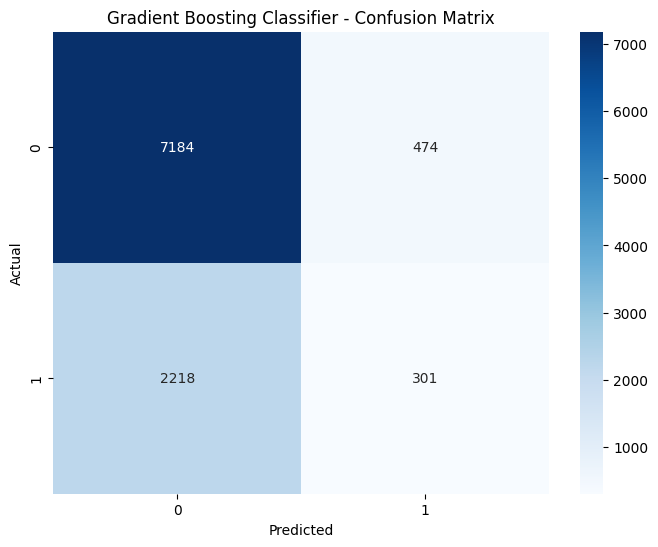

In [184]:
# Plot Confusion Matrix for Gradient Boosting Classifier
gb_cm = confusion_matrix(y_test, y_gb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    gb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1]
)
plt.title("Gradient Boosting Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### XGBoost Classifier 

In [179]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train_sm, y_train_sm)

y_xgb_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_xgb_pred)
xgb_report = classification_report(y_test, y_xgb_pred, zero_division=0)

print(f"XGBoost Accuracy: {xgb_accuracy}")
print("XGBoost Classification Report:")
print(xgb_report)

In [ ]:
# Plot Confusion Matrix for XGBoost Classifier
xgb_cm = confusion_matrix(y_test, y_xgb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    xgb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1]
)
plt.title("XGBoost Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### LightGBM Classifier

In [180]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier()
lgb_model.fit(X_train_sm, y_train_sm)

y_lgb_pred = lgb_model.predict(X_test)

lgb_accuracy = accuracy_score(y_test, y_lgb_pred)
lgb_report = classification_report(y_test, y_lgb_pred, zero_division=0)

print(f"LightGBM Accuracy: {lgb_accuracy}")
print("LightGBM Classification Report:")
print(lgb_report)

[LightGBM] [Info] Number of positive: 30458, number of negative: 30458
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2583
[LightGBM] [Info] Number of data points in the train set: 60916, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
# Plot Confusion Matrix for LightGBM Classifier
lgb_cm = confusion_matrix(y_test, y_lgb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    lgb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1]
)
plt.title("LightGBM Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Voting Classifier

In [181]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier
clf1 = GradientBoostingClassifier()
clf2 = XGBClassifier()
clf3 = LGBMClassifier()

eclf = VotingClassifier(
    estimators=[("gb", clf1), ("xgb", clf2), ("lgb", clf3)], voting="soft"
)

eclf.fit(X_train_sm, y_train_sm)

y_eclf_pred = eclf.predict(X_test)

eclf_accuracy = accuracy_score(y_test, y_eclf_pred)
eclf_report = classification_report(y_test, y_eclf_pred, zero_division=0)

print(f"Voting Classifier Accuracy: {eclf_accuracy}")
print("Voting Classifier Classification Report:")
print(eclf_report)

[LightGBM] [Info] Number of positive: 30458, number of negative: 30458
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2583
[LightGBM] [Info] Number of data points in the train set: 60916, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Voting Classifier Accuracy: 0.7514984769578461
Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      7658
           1       0.49      0.07      0.12      2519

    accuracy                           0.75     10177
   macro avg       0.62      0.52      0.49     10177
weighted avg       0.69      0.75      0.67     10177



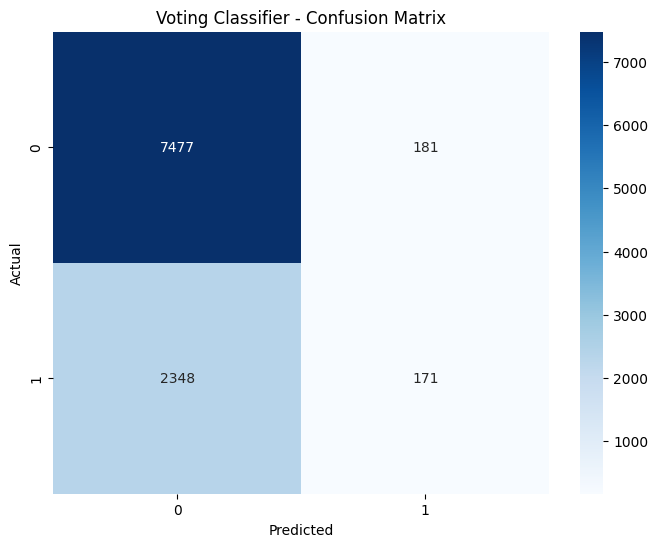

In [182]:
# Plot Confusion Matrix for Voting Classifier
eclf_cm = confusion_matrix(y_test, y_eclf_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    eclf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1]
)
plt.title("Voting Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()